In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [7]:
# Download the stock price data
df = yf.download('AAPL', start='2010-01-01', end='2023-12-31')

# Display the first few rows of the dataframe
df.head()

# Use the 'Close' price for prediction
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the number of time steps
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


[*********************100%%**********************]  1 of 1 completed


In [8]:
# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0269
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1320e-04
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0439e-04
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9850e-04
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7877e-04
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5121e-04
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4362e-04
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8807e-04
Epoch 9/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3099e-04
Epoch 10/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.2369e-04


In [9]:
# Create the testing data
test_data = scaled_data[-time_step:]
test_data = test_data.reshape(1, time_step, 1)

# Make prediction
predicted_price = model.predict(test_data)
predicted_price = scaler.inverse_transform(predicted_price)

# Print the predicted price
print(f'Predicted next closing price: ${predicted_price[0][0]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted next closing price: $190.65


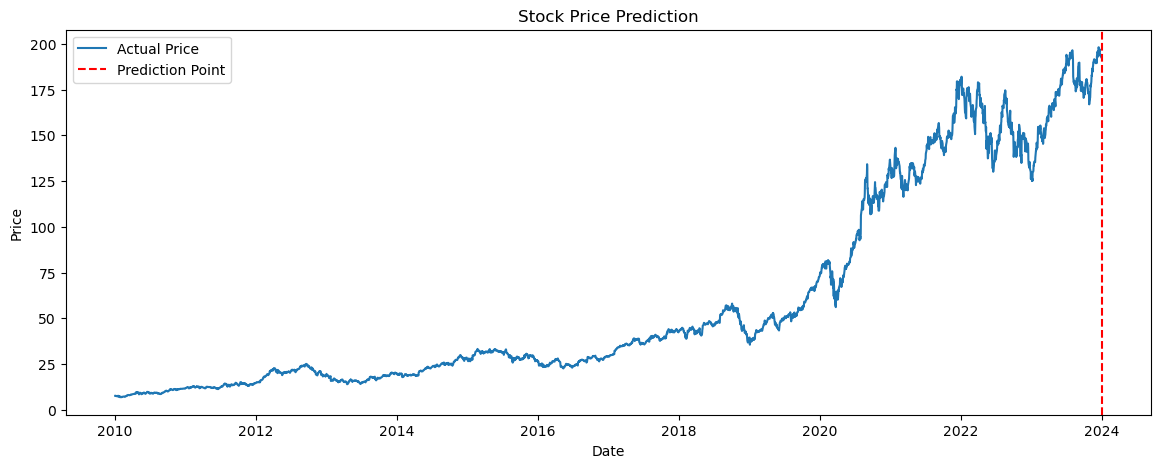

In [10]:
# Plot the results
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Close'], label='Actual Price')
plt.axvline(df.index[-1], color='r', linestyle='--', label='Prediction Point')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
